<a href="https://colab.research.google.com/github/anirbanpranto/Neural-Network-Notes/blob/main/MNIST_Shallow_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
#imports
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf

In [70]:
data=pd.read_csv('train.csv')
tdata=pd.read_csv('test.csv')

In [22]:
data.shape

(42000, 785)

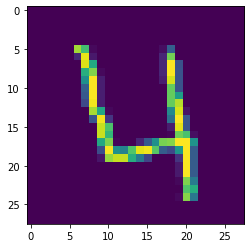

In [23]:
#Extracting data from data set and viweing them up close
a=data.iloc[3,1:].values
a=a.reshape(28,28).astype('uint8')
plt.imshow(a)

In [24]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

In [26]:
df_x=data.iloc[:,1:]
df_y=data.iloc[:,0]

In [28]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(df_x,df_y,test_size=0.2, random_state=4)

In [29]:
x_train = x_train.values.reshape((x_train.shape[0],28,28))
y_train = y_train.values
x_test = x_test.values.reshape((x_test.shape[0],28,28))
y_test = y_test.values

In [30]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [56]:
predictions = model(x_train).numpy()
predictions

array([[-2.1369673e+01, -1.0349755e+01, -1.4947186e+01, ...,
        -1.4363565e+01, -4.1358304e+00, -1.3006330e+00],
       [ 1.6627071e+01, -1.3819876e+01,  1.9126209e+00, ...,
        -2.4158375e+00, -1.0835971e+01, -7.7982348e-01],
       [-1.6858334e+01, -7.9408445e+00, -8.6395779e+00, ...,
        -9.6767130e+00, -5.4684081e+00, -1.2601748e-01],
       ...,
       [-5.3857863e-01, -2.6729391e+00,  4.8151503e+00, ...,
         1.2428408e+00,  5.5277407e-01, -2.5079863e+00],
       [ 2.6466324e+00, -7.2731595e+00, -2.5101843e-01, ...,
        -8.7329000e-03, -7.8552184e+00,  6.1510115e+00],
       [-3.0036225e+00, -1.6575855e+01,  1.5877139e+01, ...,
        -2.0260170e+01, -1.1128007e+00, -1.5908507e+01]], dtype=float32)

In [57]:
tf.nn.softmax(predictions).numpy()

array([[5.60066457e-18, 3.42080639e-13, 3.44738280e-15, ...,
        6.17949964e-15, 1.70923761e-10, 2.91147484e-09],
       [9.99999642e-01, 5.98492542e-14, 4.07000584e-07, ...,
        5.36746558e-09, 1.18291000e-12, 2.75601462e-08],
       [1.41120305e-14, 1.05294627e-10, 5.23540863e-11, ...,
        1.85578688e-11, 1.24787736e-09, 2.60820940e-07],
       ...,
       [4.39157803e-03, 5.19612397e-04, 9.28357959e-01, ...,
        2.60784142e-02, 1.30794346e-02, 6.12798613e-04],
       [2.90810913e-02, 1.43053876e-06, 1.60389859e-03, ...,
        2.04362045e-03, 7.99309589e-07, 9.67259884e-01],
       [6.31231512e-09, 8.05086775e-15, 9.99998808e-01, ...,
        2.02192548e-16, 4.18178807e-08, 1.56916513e-14]], dtype=float32)

In [58]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [59]:
loss_fn(y_train, predictions).numpy()

0.01052985

In [60]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [61]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0301 - accuracy: 0.9899
Epoch 2/10
1050/1050 [==============================] - 3s 2ms/step - loss: 0.0266 - accuracy: 0.9909
Epoch 3/10
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0252 - accuracy: 0.9914
Epoch 4/10
1050/1050 [==============================] - 3s 2ms/step - loss: 0.0223 - accuracy: 0.9923
Epoch 5/10
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0232 - accuracy: 0.9921
Epoch 6/10
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0220 - accuracy: 0.9923
Epoch 7/10
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0189 - accuracy: 0.9936
Epoch 8/10
1050/1050 [==============================] - 3s 2ms/step - loss: 0.0201 - accuracy: 0.9927
Epoch 9/10
1050/1050 [==============================] - 2s 2ms/step - loss: 0.0182 - accuracy: 0.9936
Epoch 10/10
1050/1050 [==============================] - 3s 2ms/step - loss: 0.019

In [63]:
model.evaluate(x_test,  y_test, verbose=2)

263/263 - 0s - loss: 0.1316 - accuracy: 0.9720 - 342ms/epoch - 1ms/step


[0.13155341148376465, 0.9720237851142883]

In [71]:
newdata = tdata.values.reshape((tdata.shape[0],28,28))

In [72]:
score = model(newdata).numpy()
score = np.argmax(score, axis=1) 

In [73]:
score

array([2, 0, 9, ..., 3, 9, 2])

In [79]:
submission=pd.DataFrame({'ImageId':tdata.index+1,'Label':score})

In [77]:
tdata.tail()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27999,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
submission

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [83]:
submission.to_csv('submission_2.csv',index=False)